<a href="https://colab.research.google.com/github/betulkaramann/Data-Augmentation/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import layers
from keras.models import Sequential

In [ ]:
##Model Kuruyoruz
model = Sequential()
## Görsel veriler üzerinde (2D veriler) çalışırken kullanılan bir katman
## Burada 32, bu konvolüsyonel katmanın çıkış kanallarının (feature maps) sayısını belirtir. Yani, 32 farklı filtre uygulanarak 32 farklı özelliği çıkaran yeni bir görüntü elde edilir.
## 3x3'lük küçük pencerelerle (kernel) görüntü üzerinde kayarak işlem yapar.
## Modelin girdi şekli (28, 28, 1) olacak, yani 28x28 piksel boyutlarında ve tek kanal (siyah-beyaz) görüntüler.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Flatten(): Konvolüsyonel katmanlardan gelen çok boyutlu veriyi düzleştirir, yani vektöre dönüştürür.
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,690 (72.61 MB)

 Trainable params: 19,034,690 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
##metrics=['acc']: Modelin eğitimi sırasında doğruluk (accuracy) metriği takip edilir.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
##rescale=1./255: Görüntülerin piksel değerlerini 0 ile 255 arasında olan aralıktan 0 ile 1 arasına normalleştirir.


In [ ]:
import tensorflow as tf

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
import os

base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val


print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
BATCH_SIZE = 20
IMG_SHAPE  = 150

In [ ]:
train_data_gen = train_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


In [ ]:
validation_data_gen = test_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=validation_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_data_gen, epochs=10, validation_data=validation_data_gen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - acc: 0.5065 - loss: 0.7049 - val_acc: 0.6420 - val_loss: 0.6633
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - acc: 0.6053 - loss: 0.6668 - val_acc: 0.6860 - val_loss: 0.6233
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - acc: 0.6591 - loss: 0.6265 - val_acc: 0.6640 - val_loss: 0.5977
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - acc: 0.7079 - loss: 0.5738 - val_acc: 0.6510 - val_loss: 0.5908
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - acc: 0.7072 - loss: 0.5360 - val_acc: 0.7100 - val_loss: 0.5590
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - acc: 0.7414 - loss: 0.5065 - val_acc: 0.7010 - val_loss: 0.5580
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - acc: 0.8007 - loss: 0.4362 - val_acc: 0.7110 - val_loss: 0.5766
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - acc: 0.8124 - loss: 0.4190 - val_acc: 0.7070 - val_loss: 0.5615
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - ac

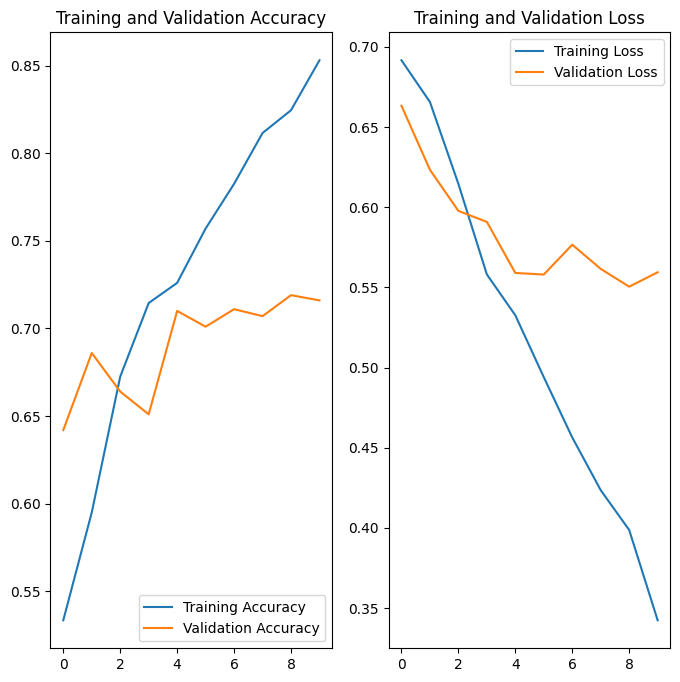

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']  # TensorFlow 2.x ile 'acc' yerine 'accuracy' kullanılabilir
val_acc = history.history['val_acc']  # 'val_acc' yerine 'val_accuracy'
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 10  # Eğitimde kullanılan epoch sayısı
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()
